In [83]:
import os
import math
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt

import multiprocessing

In [88]:
EED_PATH  = os.path.join(os.getcwd(), 'raw_dataset')
RZD_PATH  = os.path.join(os.getcwd(), 'rez_dataset')
DUMP_PATH = os.path.join(os.getcwd(), 'raw_dataset', '_dump')

C_HEALTHY   = "healthy"
C_LEAF_RUST = "leaf_rust"
C_STEM_RUST = "stem_rust"
C_SMUT     = "smut"

DIR_HEALTHY   = os.path.join( EED_PATH, C_HEALTHY)
DIR_LEAF_RUST = os.path.join( EED_PATH, C_LEAF_RUST)
DIR_STEM_RUST = os.path.join( EED_PATH, C_STEM_RUST)
DIR_SMUT      = os.path.join( EED_PATH, C_SMUT)

RZD_HEALTHY   = os.path.join( RZD_PATH, C_HEALTHY)
RZD_LEAF_RUST = os.path.join( RZD_PATH, C_LEAF_RUST)
RZD_STEM_RUST = os.path.join( RZD_PATH, C_STEM_RUST)
RZD_SMUT      = os.path.join( RZD_PATH, C_SMUT)

IMG_LABEL = { C_HEALTHY: 'HW',
              C_LEAF_RUST: 'LR',
              C_STEM_RUST: 'SR',
              C_SMUT: 'SM'
            }

In [4]:
def get_abs_path(file_name, dirr):
    return os.path.join(dirr, file_name)

def get_imgs(img_list, dtype):
    img_h =  os.listdir(dtype)
    img_h = [x for x in img_h if x[0] not in ['.', '_']]
    img_list += list(map(get_abs_path, img_h, [dtype] * len(img_h)))
    return img_list

img_list = []
img_list = get_imgs(img_list, DIR_HEALTHY)
img_list = get_imgs(img_list, DIR_LEAF_RUST)
img_list = get_imgs(img_list, DIR_STEM_RUST)
img_list = get_imgs(img_list, DIR_SMUT)

print("Total :", len(img_list))

Total : 4900


In [13]:
max_w = 0
min_w = 10000

max_h = 0
min_h = 10000

def max_min_set(h, w):
    global max_w, min_w, max_h, min_h
    if (h > max_h):
        max_h = h
    if (h < min_h):
        min_h = h
    if (w > max_w):
        max_w = w
    if (w < min_w):
        min_w = w

width_list = []
height_list = []

for img in img_list:
    mat_img = cv.imread(img, cv.COLOR_BGR2GRAY)
    height, width = mat_img.shape[:2]
    #print(height, width)
    height_list.append(height)
    width_list.append(width)
    max_min_set(height, width)
    # plt.imshow(cv.cvtColor(mat_img, cv.COLOR_BGR2GRAY), cmap='gray')
    #plt.show()
    #break;
print("MAX : ", max_h, max_w)
print("MIN : ", min_h, min_w)

MAX :  5376 6000
MIN :  100 63


In [14]:
df = pd.DataFrame({"img":img_list, "height":height_list, "width": width_list})

In [15]:
df

,img,height,width
0,/Users/ck-intosh/Downloads/COMP_8157/Project/P...,130,386
1,/Users/ck-intosh/Downloads/COMP_8157/Project/P...,183,275
2,/Users/ck-intosh/Downloads/COMP_8157/Project/P...,182,277
3,/Users/ck-intosh/Downloads/COMP_8157/Project/P...,194,259
4,/Users/ck-intosh/Downloads/COMP_8157/Project/P...,194,259
...,...,...,...
4895,/Users/ck-intosh/Downloads/COMP_8157/Project/P...,194,259
4896,/Users/ck-intosh/Downloads/COMP_8157/Project/P...,259,194
4897,/Users/ck-intosh/Downloads/COMP_8157/Project/P...,600,600
4898,/Users/ck-intosh/Downloads/COMP_8157/Project/P...,259,194


In [16]:
df.to_csv(os.path.join(EED_PATH, "dimensions.csv"))

Values Total        :  4900
Values under Limit  :  3324
Values !under Limit :  1576


(array([0.00291787, 0.        , 0.00015092, 0.00040246, 0.00110678,
        0.00080493, 0.00065401, 0.00166017, 0.00216325, 0.00206263,
        0.00316941, 0.01162117, 0.00352157, 0.02731729, 0.00970946,
        0.02374542, 0.00452773, 0.00211294, 0.00095585, 0.00150924,
        0.00648974, 0.0024651 , 0.00216325, 0.00095585, 0.00130801,
        0.00392403, 0.00764683, 0.00191171, 0.00206263, 0.00910576,
        0.0168029 , 0.00166017, 0.00030185, 0.00382341, 0.00105647,
        0.00040246, 0.00085524, 0.00045277, 0.00015092, 0.00015092,
        0.00040246, 0.00055339, 0.0006037 , 0.00055339, 0.00015092,
        0.        , 0.        , 0.00035216, 0.00025154, 0.00055339]),
 array([100.  , 105.98, 111.96, 117.94, 123.92, 129.9 , 135.88, 141.86,
        147.84, 153.82, 159.8 , 165.78, 171.76, 177.74, 183.72, 189.7 ,
        195.68, 201.66, 207.64, 213.62, 219.6 , 225.58, 231.56, 237.54,
        243.52, 249.5 , 255.48, 261.46, 267.44, 273.42, 279.4 , 285.38,
        291.36, 297.34, 303.32

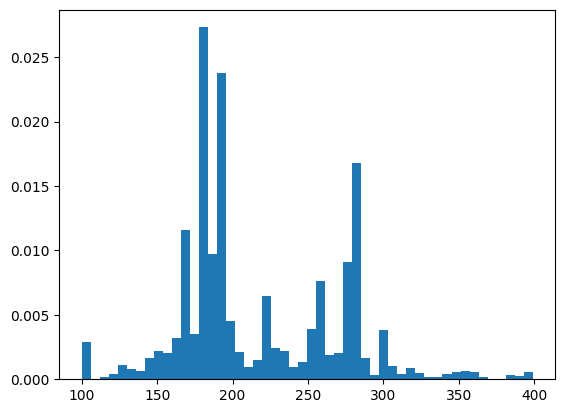

In [34]:
LIMIT = 400
limit_df = df.height[df.height < LIMIT]
print("Values Total        : ", len(df))
print("Values under Limit  : ", len(limit_df))
print("Values !under Limit : ", len(df) - len(limit_df))
plt.hist(limit_df, density=True, bins=50)

Values Total        :  4900
Values under Limit  :  3225
Values !under Limit :  1675


(array([1.40095265e-04, 0.00000000e+00, 0.00000000e+00, 4.66984216e-05,
        0.00000000e+00, 2.61511161e-03, 9.33968432e-05, 3.26888951e-04,
        1.40095265e-04, 2.33492108e-04, 1.40095265e-04, 7.93873167e-04,
        2.80190530e-04, 8.40571589e-04, 1.21415896e-03, 3.08209583e-03,
        1.72784160e-03, 3.59577846e-03, 9.71327169e-03, 1.31689549e-02,
        4.38965163e-03, 1.63444476e-03, 1.54104791e-03, 2.94200056e-03,
        5.93069954e-03, 1.44765107e-03, 8.87270010e-04, 1.86793686e-03,
        2.89530214e-03, 1.87727655e-02, 5.88400112e-03, 2.51704492e-02,
        6.72457271e-03, 2.56841319e-03, 1.77454002e-03, 1.09741291e-02,
        1.07406370e-03, 2.05473055e-03, 1.35425423e-03, 9.80666853e-04,
        8.87270010e-04, 4.20285794e-04, 1.86793686e-03, 6.53777902e-04,
        2.80190530e-04, 1.86793686e-04, 7.93873167e-04, 2.80190530e-04,
        4.66984216e-04, 5.74390586e-03]),
 array([ 63.  ,  69.64,  76.28,  82.92,  89.56,  96.2 , 102.84, 109.48,
        116.12, 122.76

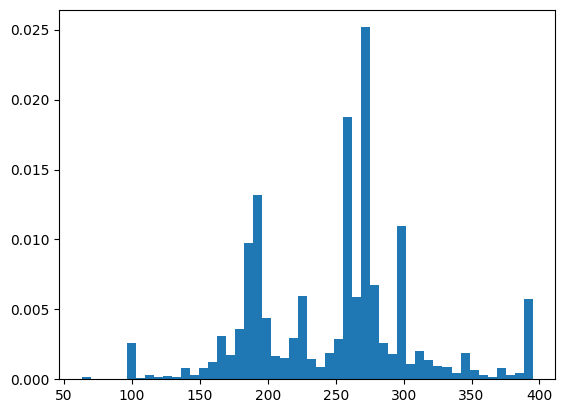

In [33]:
LIMIT = 400
limit_df = df.width[df.width < LIMIT]
print("Values Total        : ", len(df))
print("Values under Limit  : ", len(limit_df))
print("Values !under Limit : ", len(df) - len(limit_df))
plt.hist(limit_df, density=True, bins=50)

In [35]:
IMG_SIZE = 256

ORG :  194 259
Img :  86 342 256
NEW SIZE :  (256, 256, 3)


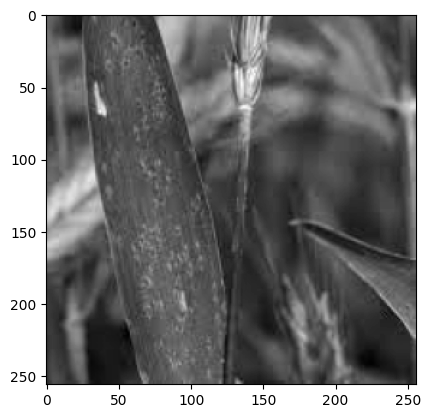

Img :  0 256 256
NEW SIZE :  (256, 256, 3)


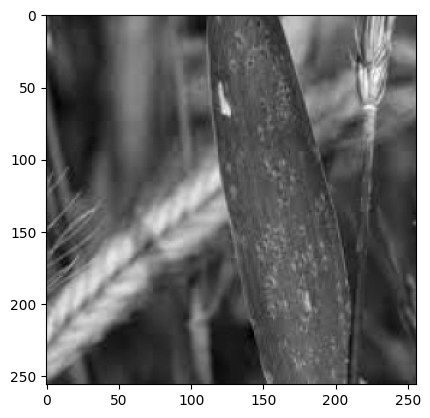

old H-W 194 259
new H-W 256 0
New IMG : 2


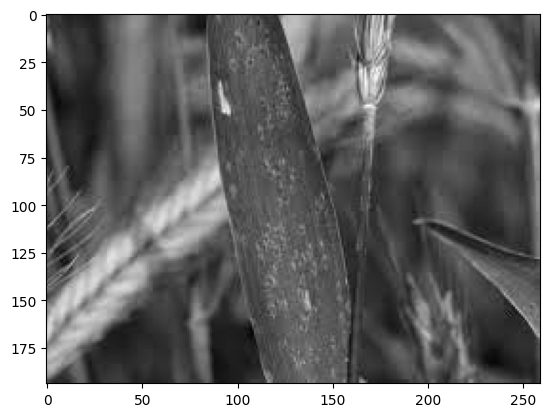

In [77]:
img = img_list[2250]
mat_img = cv.imread(img, cv.COLOR_BGR2GRAY)
height, width = mat_img.shape[:2]
print("ORG : ", height, width)
if width < height:
    factor = IMG_SIZE/width
    n_width = IMG_SIZE
    n_height = round(height * factor)
    p_img_count = math.ceil(n_height/IMG_SIZE)
    rez_img = cv.resize(mat_img, (n_width, n_height), interpolation = cv.INTER_AREA)
    for i in range(p_img_count):
        if n_height < IMG_SIZE:
            n_height = IMG_SIZE
        end = n_height
        start = n_height - IMG_SIZE
        print("Img : ", start, end, IMG_SIZE)
        n_height -= IMG_SIZE
        n_mat = rez_img[:, start:end, :]
        print("NEW SIZE : ", n_mat.shape)
        plt.imshow(cv.cvtColor(n_mat, cv.COLOR_BGR2GRAY), cmap='gray')
        plt.show()
else:
    factor = IMG_SIZE/height
    n_width = round(width * factor)
    n_height = IMG_SIZE
    p_img_count = math.ceil(n_width/IMG_SIZE)
    rez_img = cv.resize(mat_img, (n_width, n_height), interpolation = cv.INTER_AREA)
    for i in range(p_img_count):
        if n_width < IMG_SIZE:
            n_width = IMG_SIZE
        end = n_width
        start = n_width - IMG_SIZE
        print("Img : ", start, end, IMG_SIZE)
        n_width -= IMG_SIZE
        n_mat = rez_img[:, start:end, :]
        print("NEW SIZE : ", n_mat.shape)
        plt.imshow(cv.cvtColor(n_mat, cv.COLOR_BGR2GRAY), cmap='gray')
        plt.show()

print("old H-W", height, width)
print("new H-W", n_height, n_width)
print("New IMG :", p_img_count)
plt.imshow(cv.cvtColor(mat_img, cv.COLOR_BGR2GRAY), cmap='gray')

plt.show()

In [113]:
def get_type_from_path(path, img_c, batch_no):
    path_n = os.path.dirname(path).split('/')[-1]
    file_name = os.path.basename(path).split('.')[0] + "_" + str(img_c) + "_B_" + str(batch_no) + ".jpg"
    return os.path.join( RZD_PATH, path_n, file_name)


def resize_img(batch_no, bacth_list):
    for i,img in enumerate(batch_list):
        print("Processing Batch: ", batch_no, i, len(batch_list))
        break;
        mat_img = cv.imread(img, cv.COLOR_BGR2GRAY)
        try:
            height, width = mat_img.shape[:2]
            print("ORG : ", height, width)
            if width < height:
                factor = IMG_SIZE/width
                n_width = IMG_SIZE
                n_height = round(height * factor)
                p_img_count = math.ceil(n_height/IMG_SIZE)
                rez_img = cv.resize(mat_img, (n_width, n_height), interpolation = cv.INTER_AREA)
                count = 0
                for i in range(p_img_count):
                    if n_height < IMG_SIZE:
                        n_height = IMG_SIZE
                    end = n_height
                    start = n_height - IMG_SIZE
                    n_height -= IMG_SIZE
                    n_mat = rez_img[:, start:end, :]
                    cv.imwrite(get_type_from_path(img, count, batch_no), mat_img)
                    count += 1
            else:
                factor = IMG_SIZE/height
                n_width = round(width * factor)
                n_height = IMG_SIZE
                p_img_count = math.ceil(n_width/IMG_SIZE)
                rez_img = cv.resize(mat_img, (n_width, n_height), interpolation = cv.INTER_AREA)
                count = 0
                for i in range(p_img_count):
                    if n_width < IMG_SIZE:
                        n_width = IMG_SIZE
                    end = n_width
                    start = n_width - IMG_SIZE
                    n_width -= IMG_SIZE
                    n_mat = rez_img[:, start:end, :]
                    cv.imwrite(get_type_from_path(img, count, batch_no), mat_img)
                    count += 1
        except Exception as e:
            cv.imwrite(os.path.join(DUMP_PATH, img), mat_img)

In [105]:
print(img_list[0])
get_type_from_path(img_list[0], 2, 0)
len(img_list)

p_count = 8

red = len(img_list)%p_count
element = math.floor(len(img_list)/p_count)
for i in range(p_count):
    start = i * element
    end = (i + 1) * element
    if i == p_count - 1:
        end += len(img_list) % p_count
    print("D :", start, end)

/Users/ck-intosh/Downloads/COMP_8157/Project/Project_work/raw_dataset/healthy/HW_1008.jpg
D : 0 612
D : 612 1224
D : 1224 1836
D : 1836 2448
D : 2448 3060
D : 3060 3672
D : 3672 4284
D : 4284 4900


In [ ]:
if __name == '__main__':
    process_list = []
    p_count = multiprocessing.cpu_count() - 2

    element = math.floor(len(img_list)/p_count)

    for p_c in range(p_count):
        start = p_c * element
        end = (p_c + 1) * element
        if p_c == p_count - 1:
            end += len(img_list) % p_count
        print("D - ", p_c, ":",start, end)
        p = multiprocessing.Process(target=resize_img, args=(p_c, img_list[start:end], ))
        p.start()
        process_list.append(p)

    for p in process_list:
        p.join()

    print("Completed.");